# Enhancing in spatial Domain
I used 5*5 Gaussian filter for smoothening


the image because the noise in the image looked like a gaussian noise..

1st I used 3*3 gaussian filter..but when i tried with 5*5 gaussian filter, it gave a little more enhanced image then that of 3*3

The kernel that i used is defined in the code

the filtered image is not as exact as the original noice free image but the reduction of the noise in the image is significant..

i even tried with median filter(commented in the code). but the noice reduction was less than that of the 5*5 gaussian filter

(-0.5, 511.5, 511.5, -0.5)

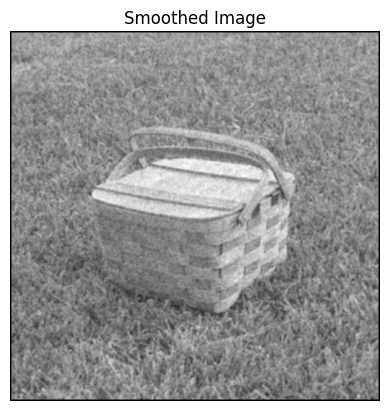

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

#reading image file
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image Processing/basket_noisy.png',cv2.IMREAD_GRAYSCALE)

#3*3 Gaussian filter for image smoothening because the noise looked like gaussian noise
kernel = np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]]) / 273

height,width=image.shape

#blank image to store the smooth image
smooth = np.zeros_like(image)

#applying the kernel to the grayscale image
for y in range(2,height-2):
  for x in range(2,width-2):
        smooth[y, x] = np.sum(image[y - 2:y + 3, x - 2:x + 3] * kernel)

#median filter(not giving as accurate answer as 5*5 gaussian)
'''for y in range(1, height - 1):
    for x in range(1, width - 1):
        smooth[y][x]=np.median(image[y - 1:y + 2, x - 1:x + 2])'''

plt.imshow(smooth, cmap = 'gray')
plt.title('Smoothed Image')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

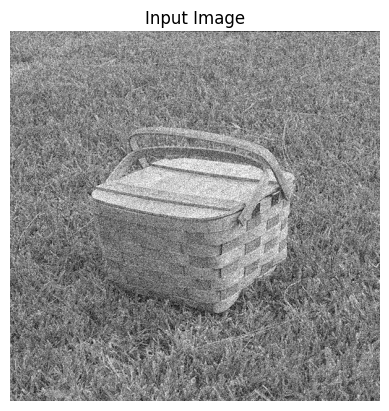

In [9]:
image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image Processing/basket_noisy.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

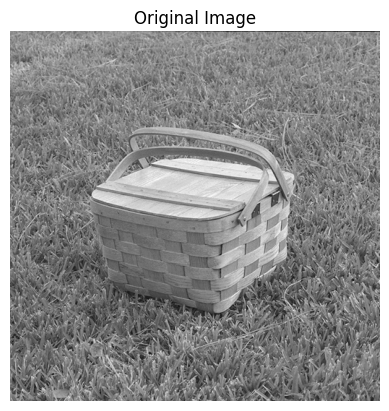

In [19]:
image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image Processing/basket.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(image1, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

#Enhancing Image in Frequency domain

I used 5*5 gaussian filter for the same reason as mentioned above..

both the image and the kernel were converted to the frequency domain by applying fourier transform

now the two transforms were multiplied that is equivalent to doing convolution in the frequency domain

the result that we got by multiplying was converted back to spatial domain by doing inverse fourier transform

(-0.5, 511.5, 511.5, -0.5)

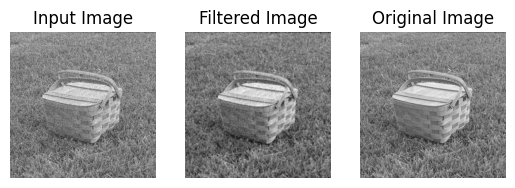

In [31]:
import cv2
import numpy as np
import numpy.fft as n
import matplotlib.pyplot as plt

#Reading image file
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image Processing/basket_noisy.png',cv2.IMREAD_GRAYSCALE)

#5x5 Gaussinan kernel for image smoothing
filt = np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]]) / 273


#Performing Fourier Transform on the image
image_fourier = n.fft2(image)

#Performing Fourier Transform on the filter
filter_fourier = n.fft2(filt, s = image.shape)

#Multiply the Fourier transforms
conv_fourier = image_fourier * filter_fourier

#Perform Inverse Fourier Transform(converting the processesed image back to spatial domain)
smooth = n.ifft2(conv_fourier).real

plt.subplot(131)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(smooth, cmap = 'gray')
plt.title('Filtered Image')
plt.axis('off')


plt.subplot(133)
plt.imshow(image1, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

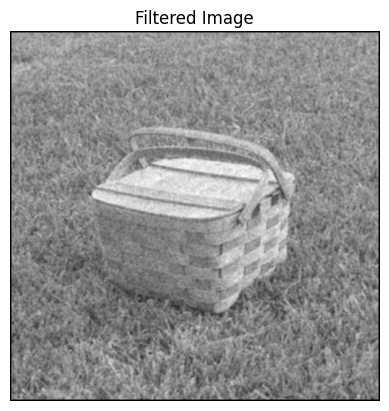

In [37]:
plt.imshow(smooth, cmap = 'gray')
plt.title('Filtered Image')
plt.axis('off')